In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

In [3]:
#
plotdata = {"batchsize":[],"loss":[]}
def moving_average(a,w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

In [4]:
#生成训练数据
train_X = np.linspace(-1,1,100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3

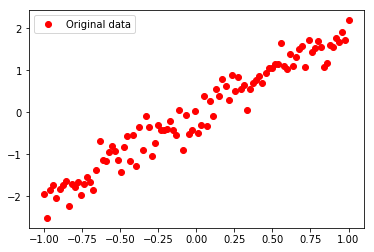

In [5]:
#图形显示
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [6]:
#重置图
tf.reset_default_graph()

In [7]:
# 创建模型
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")
# 模型参数
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

In [8]:
# 前向结构
z = tf.multiply(X, W)+ b

In [9]:
#反向优化
cost =tf.reduce_mean( tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [10]:
# 初始化变量
init = tf.global_variables_initializer()

In [11]:
#参数设置
training_epochs = 20
display_step = 2

In [12]:
#生成saver
saver = tf.train.Saver(max_to_keep=1) # 生成saver
savedir = "log_checkpoint/"

Epoch: 1 cost= 0.0818437 W= [ 1.90252721] b= [-0.01331893]
Epoch: 3 cost= 0.0778365 W= [ 1.96256483] b= [-0.03420852]
Epoch: 5 cost= 0.0773333 W= [ 1.97832251] b= [-0.04021926]
Epoch: 7 cost= 0.0772423 W= [ 1.98240125] b= [-0.04178384]
Epoch: 9 cost= 0.0772215 W= [ 1.98345542] b= [-0.04218838]
Epoch: 11 cost= 0.0772162 W= [ 1.98372817] b= [-0.04229302]
Epoch: 13 cost= 0.0772149 W= [ 1.98379922] b= [-0.04232035]
Epoch: 15 cost= 0.0772145 W= [ 1.98381758] b= [-0.04232734]
Epoch: 17 cost= 0.0772144 W= [ 1.98382246] b= [-0.04232922]
Epoch: 19 cost= 0.0772144 W= [ 1.98382378] b= [-0.0423297]
 Finished!
cost= 0.0772144 W= [ 1.98382425] b= [-0.04232986]


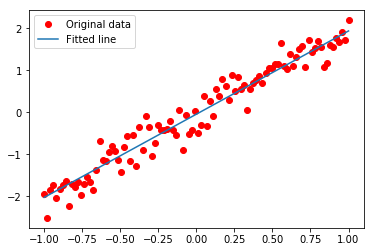

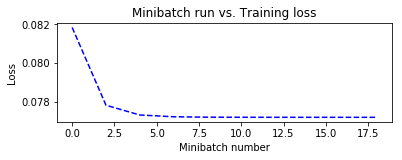

In [13]:
# 启动session
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA" ):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
            saver.save(sess, savedir+"linermodel.cpkt",global_step=epoch)
    print (" Finished!")
    
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))
    #print ("cost:",cost.eval({X: train_X, Y: train_Y}))

    #图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
     
    plt.show()


In [19]:
#加载模型
load_epoch=18
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2,savedir+"linermodel.cpkt-"+str(load_epoch))
    print("x=0.2, z=",sess2.run(z,feed_dict={X:0.2}))

INFO:tensorflow:Restoring parameters from log_checkpoint/linermodel.cpkt-18
x=0.2, z= [ 0.35443506]


In [16]:
#查看模型内容

In [21]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
savedir = "log_checkpoint/"
print_tensors_in_checkpoint_file(savedir+"linermodel.cpkt-"+str(load_epoch),None,True)

tensor_name:  weight
[ 1.98382378]
tensor_name:  bias
[-0.0423297]
